Question **1**

---


Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset andmaterials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [27]:
# Import libraries and dataset
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|', index_col='user_id')

# Mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("Mean age per occupation:\n", mean_age_per_occupation, "\n")

male_ratio_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
male_ratio_per_occupation['male_ratio'] = male_ratio_per_occupation['M'] / (male_ratio_per_occupation['M'] + male_ratio_per_occupation['F'])
male_ratio_per_occupation_sorted = male_ratio_per_occupation['male_ratio'].sort_values(ascending=False)
print("Male ratio per occupation (sorted):\n", male_ratio_per_occupation_sorted, "\n")

# Minimum and Maximum ages per occupation
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("Minimum and Maximum ages per occupation:\n", min_max_age_per_occupation, "\n")

mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print("Mean age per occupation and sex:\n", mean_age_per_occupation_sex, "\n")

# Percentage of women and men per occupation
gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_percentage_per_occupation['total'] = gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F']
gender_percentage_per_occupation['female_percentage'] = (gender_percentage_per_occupation['F'] / gender_percentage_per_occupation['total']) * 100
gender_percentage_per_occupation['male_percentage'] = (gender_percentage_per_occupation['M'] / gender_percentage_per_occupation['total']) * 100
print("Percentage of women and men per occupation:\n", gender_percentage_per_occupation[['female_percentage', 'male_percentage']])


Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64 

Male ratio per occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other   

Question 2

---


Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign themto a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goals
Step 11. Select the teams that startwith G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [28]:
# Import dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

# Selected Goal column
goal_column = euro12['Goals']
print("Selected Goal column:\n", goal_column, "\n")

# Teams participated in Euro2012
num_teams = euro12['Team'].nunique()
print("Number of teams participated in Euro2012:", num_teams, "\n")

# Number of columns in the dataset
num_columns = len(euro12.columns)
print("Number of columns in the dataset:", num_columns, "\n")

# Discipline DataFrame (view only the columns Team, Yellow Cards, and Red Cards)
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("Discipline DataFrame:\n", discipline, "\n")

# Teams sorted by Red Cards, then Yellow Cards
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
print("Teams sorted by Red Cards, then Yellow Cards:\n", discipline_sorted, "\n")

# Mean Yellow Cards given per Team
mean_yellow_cards = euro12['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:", mean_yellow_cards, "\n")

# Teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print("Teams that scored more than 6 goals:\n", teams_more_than_6_goals, "\n")

# Teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print("Teams that start with G:\n", teams_starting_with_G, "\n")

# First 7 columns
first_7_columns = euro12.iloc[:, :7]
print("First 7 columns:\n", first_7_columns, "\n")

# All columns except the last 3
all_columns_except_last_3 = euro12.iloc[:, :-3]
print("All columns except the last 3:\n", all_columns_except_last_3, "\n")

# Shooting Accuracy from England, Italy, and Russia
shooting_accuracy_selected_teams = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print("Shooting Accuracy from England, Italy, and Russia:\n", shooting_accuracy_selected_teams)


Selected Goal column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64 

Number of teams participated in Euro2012: 16 

Number of columns in the dataset: 35 

Discipline DataFrame:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13        

Question 3

---


Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:• The first a random number from 1 to 4• The second a random number from 1 to 3• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign itto 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [29]:
# Import new libraries
import numpy as np

# Create 3 different Series
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Create a DataFrame by joining the Series by column
df = pd.DataFrame({'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3})
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0), columns=['bigcolumn'])
print("Is it true that 'bigcolumn' only goes until index 99?", bigcolumn.index.max() == 99)

# Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
print("\nDataFrame with reindexed 'bigcolumn':\n", bigcolumn)


Is it true that 'bigcolumn' only goes until index 99? True

DataFrame with reindexed 'bigcolumn':
      bigcolumn
0            3
1            2
2            2
3            2
4            4
..         ...
295      23346
296      26101
297      25510
298      20331
299      26335

[300 rows x 1 columns]


Question 4

---


Wind Statistics
The data have been modified to contain some missing values, identified by NaN.Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop orother looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BELMAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns areaverage windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a properdatetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix itand apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should bedatetime64[ns].
Step 6. Compute how many values are missing for each location over the entirerecord.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations andall the times.A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and meanwindspeeds and standard deviations of the windspeeds at each location over all thedaysA different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and meanwindspeed and standard deviations of the windspeeds across all the locations at eachday.A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of thewindspeeds across all locations for each week (assume that the first week starts onJanuary 2 1961) for the first 52 weeks

In [30]:
# Read the uploaded file and parse dates
file_path = "wind.txt"
data = pd.read_table(file_path, sep='\s+', parse_dates=[[0, 1, 2]])
data.set_index('Yr_Mo_Dy', inplace=True)

#fix the year (assuming it should be 1961, not 2061)
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.Timestamp(f"{year}-{x.month}-{x.day}")

data.index = data.index.map(fix_year)
data.index = pd.to_datetime(data.index)

#count missing values for each location over the entire record
missing_values_per_location = data.isnull().sum()
print("Missing values per location:\n", missing_values_per_location)
non_missing_values_total = data.notnull().sum().sum()
print("\nNumber of non-missing values in total:", non_missing_values_total)
mean_windspeed = data.mean().mean()
print("\nMean windspeed over all locations and times:", mean_windspeed)

#create loc_stats DataFrame and calculate min, max, mean, and std for each location
loc_stats = data.describe().transpose()
print("\nLocation statistics:\n", loc_stats)

#create day_stats DataFrame and calculate min, max, mean, and std for each day
day_stats = data.resample('D').agg(['min', 'max', 'mean', 'std'])
print("\nDay statistics:\n", day_stats)
average_windspeed_january = data[data.index.month == 1].mean()
print("\nAverage windspeed in January for each location:\n", average_windspeed_january)

#downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()
print("\nYearly downsampling:\n", yearly_data)
monthly_data = data.resample('M').mean()
print("\nMonthly downsampling:\n", monthly_data)

#downsample the record to a weekly frequency for each location
weekly_data = data.resample('W-Mon').mean()
print("\nWeekly downsampling:\n", weekly_data)

#min, max, mean, and std windspeeds across all locations for each week
weekly_stats = data.resample('W-Mon').agg(['min', 'max', 'mean', 'std'])
print("\nWeekly statistics across all locations:\n", weekly_stats)

Missing values per location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Number of non-missing values in total: 78857

Mean windspeed over all locations and times: 10.227982360836938

Location statistics:
       count       mean       std   min    25%    50%    75%    max
RPT  6568.0  12.362987  5.618413  0.67   8.12  11.71  15.92  35.80
VAL  6571.0  10.644314  5.267356  0.21   6.67  10.17  14.04  33.37
ROS  6572.0  11.660526  5.008450  1.50   8.00  10.92  14.67  33.84
KIL  6569.0   6.306468  3.605811  0.00   3.58   5.75   8.42  28.46
SHA  6572.0  10.455834  4.936125  0.13   6.75   9.96  13.54  37.54
BIR  6574.0   7.092254  3.968683  0.00   4.00   6.83   9.67  26.16
DUB  6571.0   9.797343  4.977555  0.00   6.00   9.21  12.96  30.37
CLA  6572.0   8.495053  4.499449  0.00   5.09   8.08  11.42  31.08
MUL  6571.0   8.493590  4.166872  0.00   5.37   8.17  11.19  25.88
CLO  6573.0   8.707332  4.503954  0.04   5.33

Question 5

---


Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.• Turn the item price into a float
        • Check the item price type
        • Create a lambda function and change the type of item price
        • Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?Step 17. How many different items are sold?

In [31]:
# Read the uploaded file and parse dates
file_path = "wind.txt"

# Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# First 10 entries
print("First 10 entries:\n", chipo.head(10))

# Number of observations
num_observations = len(chipo)

# Number of columns
num_columns = len(chipo.columns)

# All the columns name
columns_names = chipo.columns.tolist()

# Dataset indexed
index_type = chipo.index

# Most-ordered item
most_ordered_item = chipo['item_name'].value_counts().idxmax()

# For the most-ordered item, items were ordered
most_ordered_item_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()

# Most ordered item in the choice_description column
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()

# How many items were ordered in total
total_items_ordered = chipo['quantity'].sum()

# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
# Check the item price type before
item_price_type_before = chipo['item_price'].dtype
# Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))
# Check the item price type after
item_price_type_after = chipo['item_price'].dtype

# How much was the revenue for the period in the dataset
revenue = (chipo['quantity'] * chipo['item_price']).sum()

# Orders were made in the period
num_orders = chipo['order_id'].nunique()

# Average revenue amount per order
average_revenue_per_order = revenue / num_orders

# How many different items sold
num_different_items = chipo['item_name'].nunique()

print("\nNumber of observations in the dataset:", num_observations)
print("\nNumber of columns in the dataset:", num_columns)
print("\nName of all columns:", columns_names)
print("\nIndex type:", index_type)
print("\nMost-ordered item:", most_ordered_item)
print("\nQuantity of the most-ordered item:", most_ordered_item_quantity)
print("\nMost-ordered choice description:", most_ordered_choice_description)
print("\nTotal items ordered:", total_items_ordered)
print("\nItem price type before conversion:", item_price_type_before)
print("\nItem price type after conversion:", item_price_type_after)
print("\nRevenue for the period:", revenue)
print("\nNumber of orders made:", num_orders)
print("\nAverage revenue amount per order:", average_revenue_per_order)
print("\nNumber of different items sold:", num_different_items)


First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

Question 6

---


Create a line plot showing the number of marriages and divorces per capita in theU.S. between 1867 and 2014. Label both lines and show the legend.Don't forget to label your axes!

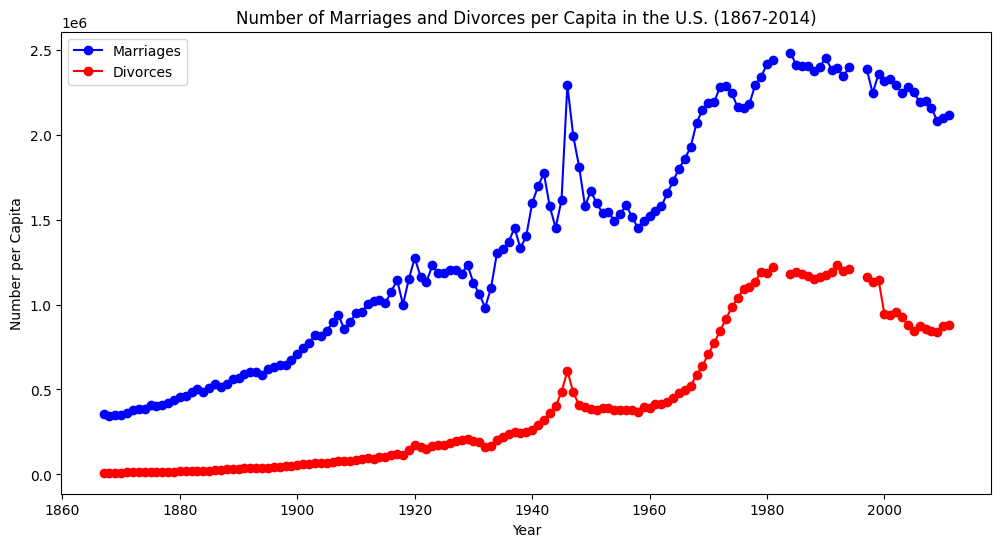

In [32]:
import matplotlib.pyplot as plt

file_path = "US Marriages Divorces 1867-2014.csv"
data = pd.read_csv(file_path)

#line plot with unique colors
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Marriages'], label='Marriages', color='blue', marker='o')
plt.plot(data['Year'], data['Divorces'], label='Divorces', color='red', marker='o')

#label the plot and show the legend
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Number per Capita')
plt.legend()

plt.show()

Question 7

---


Create a vertical bar chart comparing the number of marriages and divorces percapita in the U.S. between 1900, 1950, and 2000.Don't forget to label your axes!

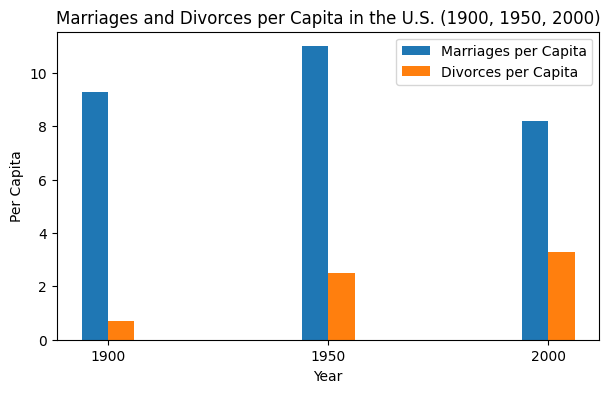

In [33]:
file_path = "US Marriages Divorces 1867-2014.csv"
marriage_divorce_data = pd.read_csv(file_path)

#filter data
selected_years = [1900, 1950, 2000]
selected_data = marriage_divorce_data[marriage_divorce_data['Year'].isin(selected_years)]

#vertical bar chart
plt.figure(figsize=(7, 4))
bar_width = 6

#plot marriages per capita
plt.bar(selected_data['Year'] - bar_width / 2, selected_data['Marriages_per_1000'],
        width=bar_width, label='Marriages per Capita')

#plot divorces per capita
plt.bar(selected_data['Year'] + bar_width / 2, selected_data['Divorces_per_1000'],
        width=bar_width, label='Divorces per Capita')

plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.legend()
plt.xticks(selected_data['Year'])
plt.show()

Question 8

---


Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sortthe actors by their kill count and label each bar with the corresponding actor's name.Don't forget to label your axes!

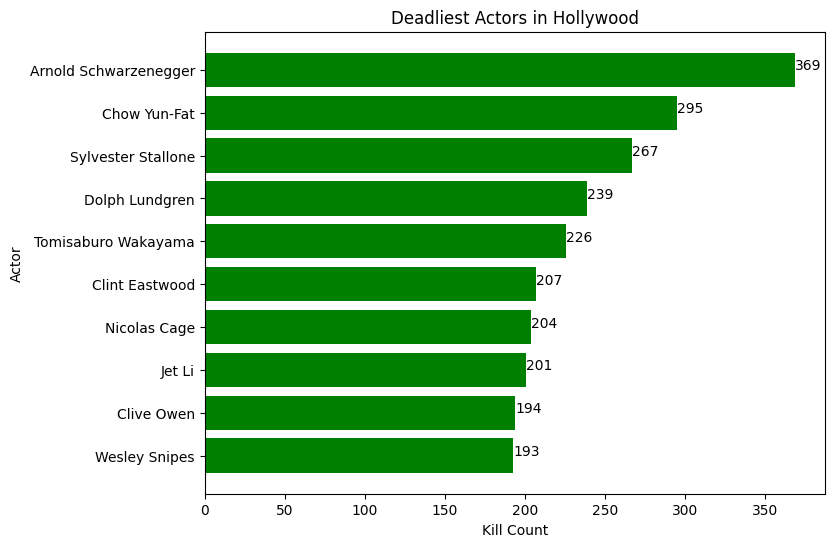

In [34]:
file_path = "Actor Kill Counts.csv"
actor_kill_counts = pd.read_csv(file_path)

#sort the data by kill count
sorted_data = actor_kill_counts.sort_values(by='Count', ascending=True)

#horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='green')

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

for index, value in enumerate(sorted_data['Count']):
    plt.text(value, index, str(value))

plt.show()

Question 9

---


Create a pie chart showing the fraction of all Roman Emperors that wereassassinated.Make sure that the pie chart is an even circle, labels the categories, and shows thepercentage breakdown of the categories

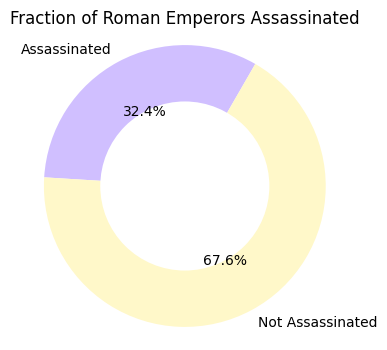

In [35]:
file_path = "Roman Emperor Reigns.csv"
roman_emperors_data = pd.read_csv(file_path)

#number of emperors who were assassinated
assassinated_count = roman_emperors_data[roman_emperors_data['Cause_of_Death'] == 'Assassinated'].shape[0]

#number of emperors who were not assassinated
not_assassinated_count = roman_emperors_data[roman_emperors_data['Cause_of_Death'] != 'Assassinated'].shape[0]

#pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, not_assassinated_count]
colors = ["#D0BFFF", '#FFF8C9']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=60)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Fraction of Roman Emperors Assassinated')
plt.show()

Question 10

---


Create a scatter plot showing the relationship between the total revenue earned byarcades and the number of Computer Science PhDs awarded in the U.S. between2000 and 2009.Don't forget to label your axes!Color each dot according to its year.

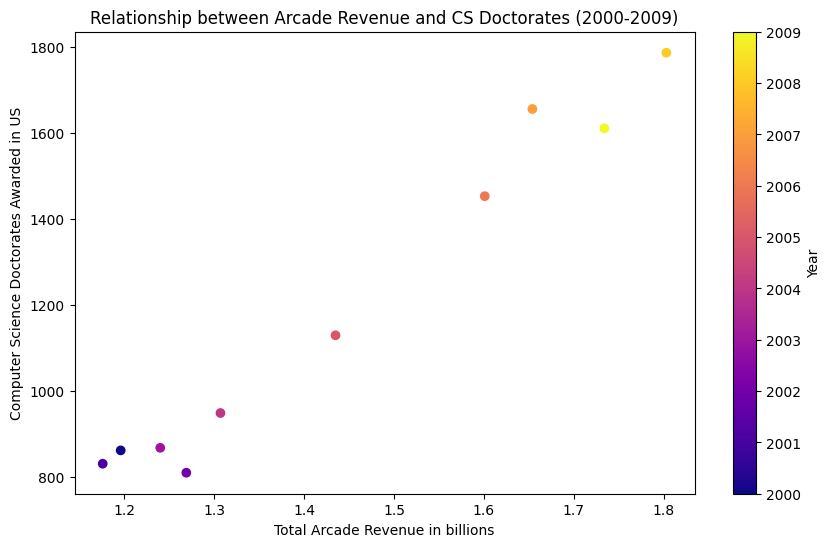

In [36]:
file_path = "Arcade Revenue vs CS Doctorates.csv"
data = pd.read_csv(file_path)

#scatter plot with a different colormap
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], c=data['Year'], cmap='plasma')

plt.xlabel('Total Arcade Revenue in billions')
plt.ylabel('Computer Science Doctorates Awarded in US')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
cbar = plt.colorbar()
cbar.set_label('Year')

plt.show()